In [13]:
import os
import sys
import re
import tqdm
from dotenv import load_dotenv
import supervision as sv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

from heatmap import vis_heatmap

load_dotenv('.env')
DIR_SRC = os.getenv('DIR_SRC')
DIR_OUT = os.path.join(DIR_SRC, 'out')
DIR_DATA = os.getenv('DIR_DATA')
DIR_STUDY1 = os.path.join(DIR_DATA, 'study1')
DIR_STUDY2 = os.path.join(DIR_SRC, 'runs', 'detect', 'b01-dense', 'labels')
MULTIPLIER = 1000 # resize the iamge for visualization

In [2]:
metadata = pd.read_csv(os.path.join(DIR_OUT, "metadata.csv"))
metadata.head()

,study,split,prefix,yyyymmdd,HHMM,datetime,count,filename,path_img,path_txt
0,study1,test_b01,t1,20221103,1556,2022-11-03 15:56:00,9,t1-20221103-1556_jpg.rf.c97ec0beb8b8a68d4b9f2d...,test_b01/images/t1-20221103-1556_jpg.rf.c97ec0...,test_b01/labels/t1-20221103-1556_jpg.rf.c97ec0...
1,study1,test_b01,t1,20221103,1626,2022-11-03 16:26:00,83,t1-20221103-1626_jpg.rf.ea75a486b2b11c5c02b340...,test_b01/images/t1-20221103-1626_jpg.rf.ea75a4...,test_b01/labels/t1-20221103-1626_jpg.rf.ea75a4...
2,study1,test_b01,t1,20221103,1656,2022-11-03 16:56:00,57,t1-20221103-1656_jpg.rf.b18995d5bd59ba542b534c...,test_b01/images/t1-20221103-1656_jpg.rf.b18995...,test_b01/labels/t1-20221103-1656_jpg.rf.b18995...
3,study1,test_b01,t1,20221103,1726,2022-11-03 17:26:00,39,t1-20221103-1726_jpg.rf.b70a3c0af38e652474cb63...,test_b01/images/t1-20221103-1726_jpg.rf.b70a3c...,test_b01/labels/t1-20221103-1726_jpg.rf.b70a3c...
4,study1,test_b01,t1,20221103,1756,2022-11-03 17:56:00,51,t1-20221103-1756_jpg.rf.5a77cb459c4e7d999a70f8...,test_b01/images/t1-20221103-1756_jpg.rf.5a77cb...,test_b01/labels/t1-20221103-1756_jpg.rf.5a77cb...


## Study 1
### test_b02

In [3]:
os.chdir(DIR_STUDY1)

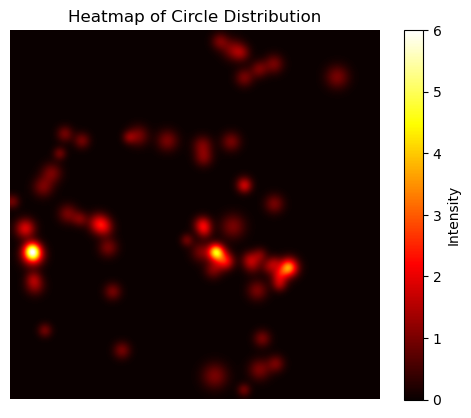

In [8]:
split = "test_b02"
ls_txt = np.sort([txt for txt in metadata.query("split == @split")["path_txt"].values if "ctrl" in txt])
vis_heatmap(ls_txt)

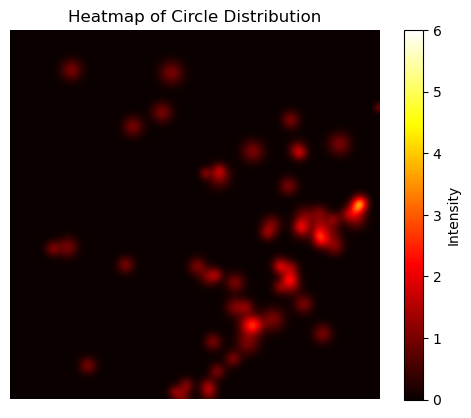

In [9]:
ls_txt = np.sort([txt for txt in metadata.query("split == @split")["path_txt"].values if "virus" in txt])
vis_heatmap(ls_txt)

### test_b01

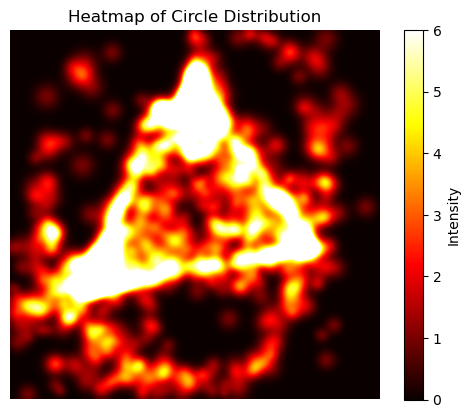

In [10]:
split = "test_b01"
ls_txt = np.sort([txt for txt in metadata.query("split == @split")["path_txt"].values if "t1" in txt])
vis_heatmap(ls_txt)

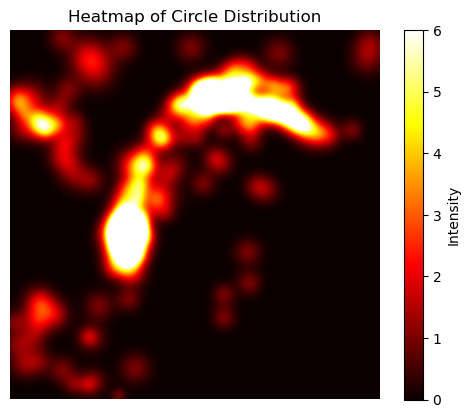

In [11]:
ls_txt = np.sort([txt for txt in metadata.query("split == @split")["path_txt"].values if "t2" in txt])
vis_heatmap(ls_txt)

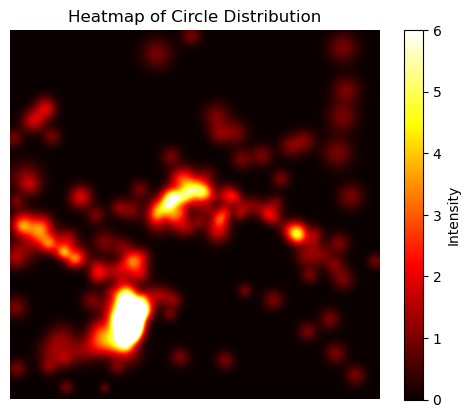

In [12]:
ls_txt = np.sort([txt for txt in metadata.query("split == @split")["path_txt"].values if "t3" in txt])
vis_heatmap(ls_txt)

## Study 2

In [19]:
ls_lbs = [os.path.join(DIR_STUDY2, f) for f in os.listdir(DIR_STUDY2)]

In [26]:
ls_vis = [f for f in ls_lbs if "t1" in f]
heatmap1 = make_heatmap(ls_vis)

Creating heatmap: 100%|██████████| 49954/49954 [05:41<00:00, 146.42it/s]


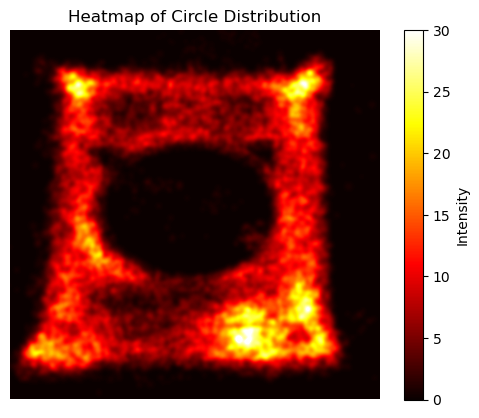

In [35]:
plot_heatmap(heatmap1, 30)

In [36]:
ls_vis = [f for f in ls_lbs if "t2" in f]
heatmap2 = make_heatmap(ls_vis)

Creating heatmap: 100%|██████████| 33461/33461 [03:41<00:00, 151.17it/s]


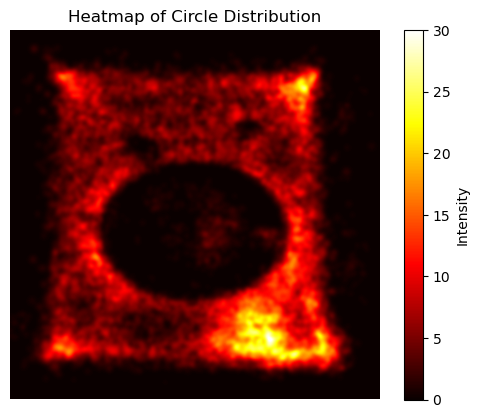

In [37]:
plot_heatmap(heatmap2, 30)